# LineIntegralConvolution.jl Examples

In [65]:
using Random

using Printf

using Plots

In [66]:
# setting parameters for electric (E) field computation
epsilon_zero = 8.85e-12  # empty space dielectric constant
k = 1.0 / (4.0 * pi * epsilon_zero)  # see electric field generated form a point source for this

## image parameters
image_width = 300  # number of pixel rows
image_height = 300  # number of pixel columns

n_charges = 5  # number of charges to randomly allocate
delta_space = 1e-1  # physical distance [m] from one "pixel center" to the adjacent ones
q = 1e-6  # fixed electric charge modulus

SEED = 7

7

In [67]:
## compute the 2D electric field 
# of equally charged 'point' sources printosed in a 2D plane

field_lin = zeros(image_width, image_height, 2)  # initialize zero electric field 
field_modulus = zeros(image_width, image_height)  # initialize the modulus only image

q_charge = rand(MersenneTwister(SEED), (-1, 1), n_charges) .* q

# generate a random position [x, y] for the new charge 
# the code below forces the position to be 'in the center'
x_charge = (rand(MersenneTwister(SEED+1), Float64, n_charges) * image_width / 2 .+ image_width / 4)
y_charge = (rand(MersenneTwister(SEED+2), Float64, n_charges) * image_height / 2 .+ image_height / 4)


5-element Vector{Float64}:
 181.06177061306073
 114.79957215967136
 113.73321444086085
 107.9922350874221
 204.1459202346007

In [68]:
for i = 1 : n_charges  # iter over the charges
 
    # for each pixel of the image, compute the electric field in that point
    # relatively to the currently generated charge
    for x = 1 : image_width
        for y = 1 : image_height
            
            # compute the distance of the current pixel position with
            # respect to the charge position, scaling to make them 'physical'
            dist_x = (x - x_charge[i]) * delta_space
            dist_y = (y - y_charge[i]) * delta_space
            
            x_versor = (dist_x) / (abs(dist_x) + abs(dist_y))
            y_versor = (dist_y) / (abs(dist_x) + abs(dist_y))
            
            # compute the squared linear distance between source and pixel
            r2 = dist_x ^ 2 + dist_y ^ 2
            
            # compute the electric field value for the current pixel
            value = (k * q) / r2
            
            # add the field computed to the overall field in this point 
            # (superposition principle)
            field_lin[x, y, 1] = field_lin[x, y, 1] + value * x_versor
            field_lin[x, y, 2] = field_lin[x, y, 2] + value * y_versor
            
            # update the modulus image
            field_modulus[x, y] =  field_modulus[x,y] + abs(value)
        end
    end
end
print("Finished cycle.")

field_log = 10.0*log10.(field_modulus)

Finished cycle.

300×300 Matrix{Float64}:
 19.3336  19.3586  19.3836  19.4086  …  20.0494  20.0146  19.9798  19.9452
 19.3609  19.386   19.4112  19.4363     20.08    20.0449  20.0099  19.975
 19.3883  19.4135  19.4388  19.4641     20.1106  20.0752  20.0399  20.0048
 19.4156  19.441   19.4664  19.4918     20.141   20.1054  20.0699  20.0345
 19.443   19.4685  19.4941  19.5196     20.1715  20.1355  20.0997  20.0641
 19.4704  19.4961  19.5217  19.5474  …  20.2018  20.1656  20.1295  20.0936
 19.4979  19.5236  19.5494  19.5752     20.2321  20.1956  20.1593  20.1231
 19.5253  19.5512  19.5771  19.6031     20.2623  20.2255  20.1889  20.1525
 19.5528  19.5788  19.6049  19.6309     20.2924  20.2554  20.2185  20.1818
 19.5803  19.6065  19.6326  19.6588     20.3224  20.2852  20.248   20.2111
  ⋮                                  ⋱                             
 22.083   22.1272  22.1715  22.2159     21.2551  21.215   21.175   21.1351
 22.0486  22.0924  22.1363  22.1803     21.2237  21.1839  21.1443  21.1047
 22.0141

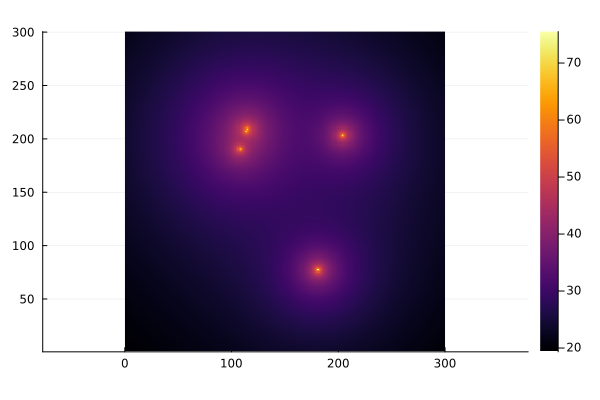

In [69]:
heatmap(field_log, aspect_ratio=:equal)
# clim=(min, max)
# findmax(field_modulus)
# findmin(field_modulus)

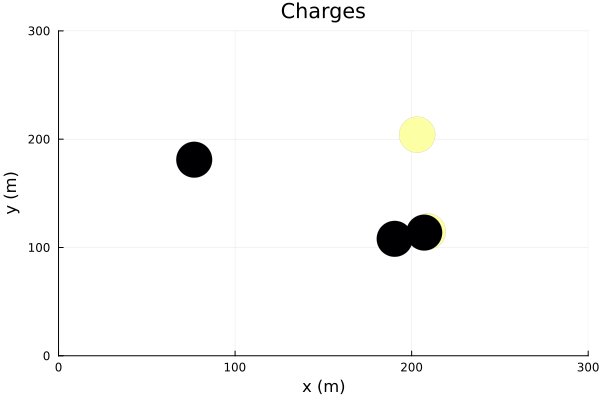

In [70]:
scatter(x_charge, y_charge, zcolor=q_charge,
legend=false, markerstrokewidth=0, marker=:circle, markersize=20.0,
xlim=(0,image_width),
ylim=(0,image_height))
title!("Charges")
xlabel!("x (m)")
ylabel!("y (m)")

In [71]:
## init images
# new_image = zeros(image_width, image_height, 3)


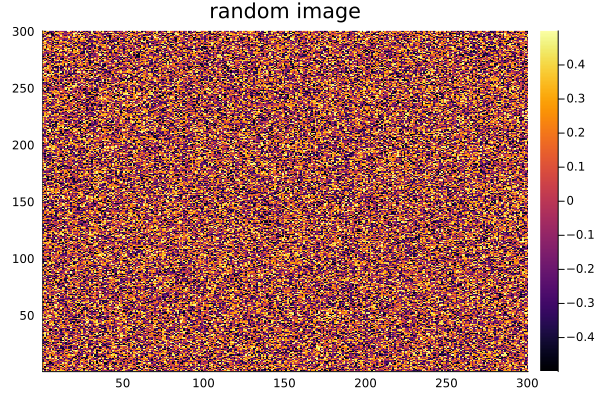

In [72]:
## initial random image
random_image = rand(image_width, image_height) .- 0.5

# new images
img1 = zeros(image_width, image_height)
img2 = zeros(image_width, image_height)

heatmap(random_image)
title!("random image")

In [73]:
# compute LIC

theta_mat = atan.(field_lin[:, :, 1], field_lin[:, :, 2])
Δx = sin.(theta_mat)
Δy = cos.(theta_mat)
abs_sin = abs.(Δx)
abs_cos = abs.(Δy)

for x = 1 : image_width
    for y = 1 : image_height

        if rand() > 1.0 - 10 / (image_width * image_height)
            print((((x * (image_height-1) + y)/(image_width * image_height))*100), " %\n");
        end

        current_pixel1 = random_image[x, y] * kernel1[1]
        current_pixel2 = random_image[x, y] * kernel2[1]
        xp = x
        yp = y
        cdx = 0
        cdy = 0
        for w = 2 : kernel_size

            cdx += Δx[xp, yp]
            cdy += Δy[xp, yp]

            # compute new position pixel
            xpc = xp + Int(round(cdx))
            ypc = yp + Int(round(cdy))

            # check new position is valid
            if xpc < 1
                xpc = 1
            elseif xpc > image_width
                xpc = image_width
            end
            if ypc < 1
                ypc = 1
            elseif ypc > image_height
                ypc = image_height
            end

            # interpolate

            # current_pixel1 += random_image[xpc, ypc] * kernel1[w]
            # current_pixel2 += random_image[xpc, ypc] * kernel2[w]

            norm_factor = (1 - abs_cos[xp, yp]) * (1 - abs_sin[xp, yp])
            current_pixel1 += random_image[xp, yp] * kernel1[w] * norm_factor
            current_pixel2 += random_image[xp, yp] * kernel2[w] * norm_factor

            norm_factor = abs_cos[xp, yp]
            current_pixel1 += random_image[xpc, yp] * kernel1[w] * norm_factor
            current_pixel2 += random_image[xpc, yp] * kernel2[w] * norm_factor

            norm_factor = abs_sin[xp, yp]
            current_pixel1 += random_image[xp, ypc] * kernel1[w] * norm_factor
            current_pixel2 += random_image[xp, ypc] * kernel2[w] * norm_factor
            
            norm_factor = abs_cos[xp, yp] * abs_sin[xp, yp]
            current_pixel1 += random_image[xpc, ypc] * kernel1[w] * norm_factor
            current_pixel2 += random_image[xpc, ypc] * kernel2[w] * norm_factor

            xp = xpc
            yp = ypc
        end
        
        # new_image[x, y, 1] = (current_pixel2 + .5) * 0.5 + (field_log[x, y]) * 0.5
        # new_image[x, y, 2] = (current_pixel2 + .5) * 0.5 + (field_log[x, y]) * 0.5 
        # new_image[x, y, 3] = (current_pixel2 + .5) * 0.5 + (1 - field_log[x, y]) * 0.5

        img1[x, y] = current_pixel1
        img2[x, y] = current_pixel2
    end
end

5.645555555555556 %


10.007777777777777 %


17.923333333333332 %


28.07777777777778 %


38.97333333333333 %


48.16444444444444 %


71.15777777777778 %
72.4088888888889 %
72.59777777777778 %


74.72333333333333 %


79.55111111111111 %


82.8588888888889 %


85.80222222222223 %


93.48777777777778 %
94.40444444444445 %


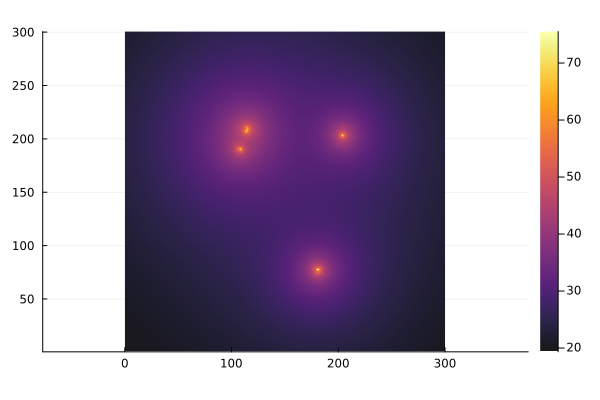

In [74]:
heatmap(field_log, aspect_ratio=:equal, fillalpha=0.9)

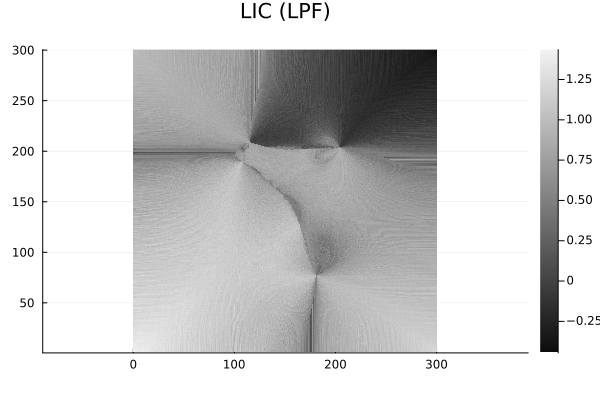

In [75]:
heatmap(img1 .+ 0.5, aspect_ratio=:equal, c=:grays)
title!("LIC (LPF)")


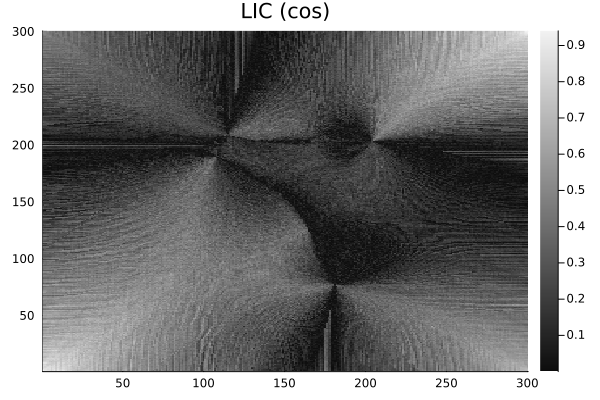

In [83]:
heatmap(abs.(img2), c=:grays)
title!("LIC (cos)")

In [77]:

# img223 = RGB.(new_image)